In [1]:
from rdkit import Chem
from rdkit.Chem import Draw

In [2]:
drugbank_input = Chem.SDMolSupplier('../data/drugbank.sdf')
drugbank = [m for m in drugbank_input if m]

In [4]:
#loading PAINS
with open('../data/PAINS/p_l15.txt') as p:
    pains_l15 = [(Chem.MolFromSmarts(smarts), comment.lstrip('<regId="').split('(')[0]) for smarts, comment in (line.split() for line in p)]

In [5]:
with open('../data/PAINS/p_l150.txt') as p:
    pains_l150 = [(Chem.MolFromSmarts(smarts), comment.lstrip('<regId="').split('(')[0]) for smarts, comment in (line.split() for line in p)]

In [11]:
with open('../data/PAINS/p_m150.txt') as p:
    pains_m150 = [(Chem.MolFromSmarts(smarts), comment.lstrip('<regId="').split('(')[0]) for smarts, comment in (line.split() for line in p)]

In [12]:
len(pains_l15), len(pains_l150), len(pains_m150)

(409, 55, 16)

In [13]:
all_pains = pains_l15 + pains_l150 + pains_m150
len(all_pains)

480

In [14]:
all_pains[:10]

[(<rdkit.Chem.rdchem.Mol at 0x1f775375d00>, 'anil_di_alk_F'),
 (<rdkit.Chem.rdchem.Mol at 0x1f76b49d990>, 'hzone_anil'),
 (<rdkit.Chem.rdchem.Mol at 0x1f775375ee0>, 'het_5_pyrazole_OH'),
 (<rdkit.Chem.rdchem.Mol at 0x1f775375f30>, 'het_thio_666_A'),
 (<rdkit.Chem.rdchem.Mol at 0x1f775376030>, 'styrene_A'),
 (<rdkit.Chem.rdchem.Mol at 0x1f7753760d0>, 'ne_rhod_C'),
 (<rdkit.Chem.rdchem.Mol at 0x1f775376080>, 'hp_amino_CN_A'),
 (<rdkit.Chem.rdchem.Mol at 0x1f775376120>, 'cyano_imine_C'),
 (<rdkit.Chem.rdchem.Mol at 0x1f775376170>, 'thio_urea_A'),
 (<rdkit.Chem.rdchem.Mol at 0x1f7753761c0>, 'thiophene_amino_B')]

In [19]:
Chem.MolToSmarts(all_pains[1][0]), drugbank[]

'c1(:c(:c(:c(:c(:c:1-[#1])-[#1])-[#7](-[#1])-[#1])-[#1])-[#1])-[#6]=[#7]-[#7]-[#1]'

In [26]:
drugbank_pains = [tuple((m.HasSubstructMatch(pain) for pain, comment in all_pains)) for m in drugbank]

In [27]:
painsfails = [i for i, patterns in enumerate(drugbank_pains) if any(patterns)]
len(drugbank_pains), len(painsfails)

(7110, 142)

In [32]:
painsfails_mols = [drugbank[i] for i in painsfails]
painsfails_hits = [[all_pains[j][1] for j, match in enumerate(drugbank_pains[i]) if match] for i in painsfails]
painsfails_hits[:10]

[['quinone_A'],
 ['anil_di_alk_C'],
 ['amino_acridine_A'],
 ['quinone_A'],
 ['styrene_A'],
 ['quinone_A'],
 ['anil_di_alk_B'],
 ['quinone_A'],
 ['azo_A'],
 ['keto_keto_beta_A']]

In [41]:
drugbank_pains[:10]
painsfails[:10]

[61, 141, 166, 195, 211, 274, 294, 332, 382, 385]

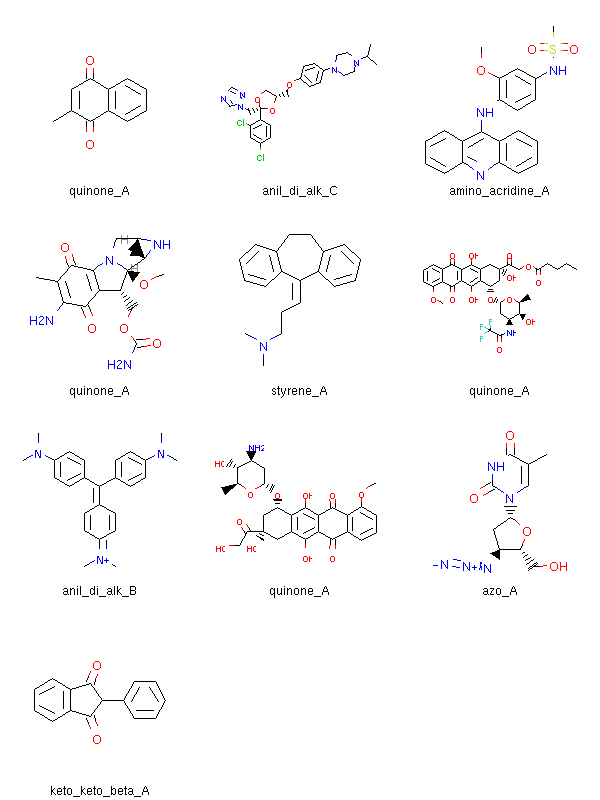

In [42]:
Draw.MolsToGridImage(painsfails_mols[:10], legends=[", ".join(fails) for fails in painsfails_hits[:10]])